In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10,5)

Los métodos de Runge-Kutta proponen la construcción de una función de incremento ${\phi}$ como una suma de términos, y el número de puntos suficientes a tomar (Condición 2 de Runge-Kutta en el informe) es de $N = k$ (Con k, orden del método)
$$
K1 = f(t,z(t))
$$
$$
K2 = f(t+\frac{h}{2},z(t)+\frac{h}{2}·K1)
$$
$$
K3 = f(t+\frac{h}{2},z(t)+\frac{h}{2}·K2)
$$
$$
K4 = f(t+h,z(t)+h·K3)
$$
Nótese que en particular, el caso del método de Euler modificado resultan los pasos iterativos:
$$
z_{n+1}=z_{n}+h·K2=z_{n}+h·{\phi}
$$
$$
z_{n+1}=z_{n}+h·f(t+\frac{h}{2},z(t)+\frac{h}{2}·K1)=z_{n}+h·f(t+\frac{h}{2},z(t)+\frac{h}{2}·f(t,z(t)))
$$

In [3]:
def paso_rk2_sistemas(z, t, h, f): 
    k1 = f(t,z)
    k2 = f(t + 0.5*h, z + 0.5*h*k1)
    z_sig = z + (h*k2)
    return z_sig


def metodo_rk2_sistemas(z0, t0, h, f, cant_pasos):
    # Inicializamos las variables z y t con sus valores iniciales
    z = z0
    t = t0

    valores_z = np.array([])                # vector vacío para almacenar los valores de z
    valores_z = np.append(valores_z, z0)    # agrego elemento al final

    valores_t = np.array([])                # vector vacío para almacenar los valores de t
    valores_t = np.append(valores_t, t0)    # agrego elemento al final
# Iteramos sobre la cantidad de pasos especificada
    for i in range(cant_pasos):
        z_sig = paso_rk2_sistemas(z, t, h, f)
        #el vstack es para que queden en columnas: col 1 es vals de x, col 2 es vals de y (en caso de tratarse de un sistema)
        valores_z = np.vstack( (valores_z, z_sig) )

        t = t + h  # Actualizamos el valor de t al siguiente punto (t+h)
        valores_t = np.append(valores_t, t)  # agrego elemento al final

        z = z_sig #actualizamos el valor de z

    return valores_t, valores_z # Devuelve los arrays con los valores de t y z

In [4]:
def paso_euler_sistemas(z, t, h, f):
    z_new = z + h*f(t,z)
    return z_new


def metodo_euler_sistemas(z0, t0, h, f, cant_pasos):
      # Inicializamos las variables z y t con sus valores iniciales
    z = z0
    t = t0

    valores_z = np.array([])               # vector vacío para almacenar los valores de z
    valores_z = np.append(valores_z, z0)   # agrego elemento al final

    valores_t = np.array([])               # vector vacío para almacenar los valores de t
    valores_t = np.append(valores_t, t0)   # agrego elemento al final

    for i in range(cant_pasos):
        z_new = paso_euler_sistemas(z, t, h, f)
        # el vstack es para que queden en columnas: col 1 es vals de x, col 2 es vals de y (en caso de tratarse de un sistema)
        valores_z = np.vstack( (valores_z, z_new) )

        t = t + h # Actualizamos el valor de t al siguiente punto (t+h)
        valores_t = np.append(valores_t, t) # agrego elemento al final

        z = z_new #actualizamos el valor de z

    return valores_t, valores_z # Devuelve los arrays con los valores de t y z

Queremos resolver numéricamente el siguiente problema:
$$
\begin{cases} 
    y'(t)=y(t),  \\
    y(0)=1
\end{cases}
$$


En el intervalo $[0, 1]$ utilizando los métodos de Euler explícito y de Euler modificado. Tomaremos $N = 2^k$ para $k = [2, . . . , 8]$. 

Para cada N calcularemos el error que se comete al aproximar $y(1)$:
$EN = |y(1)−yN|$. Sabiendo que la solución analítica es $y(t)=e^t$

Graficaremos ${\log(EN)}$ en función de ${\log(N)}$ y veremos si el resultante es consistente con lo esperado

In [5]:
def fEj4(t, z): 
    return z # definimos y(t) = z(t)

z0 = 1
t0 = 0
tf = 1

valoresN = np.array([2**k for k in range(2, 9)]) #definimos un array para todos los N requeridos en el inciso
errores_rk2 = [] #definimos un array vacío para los errores del método rk2 (Euler modificado)
errores_euler = [] #definimos un array vacío para los errores del método de Euler

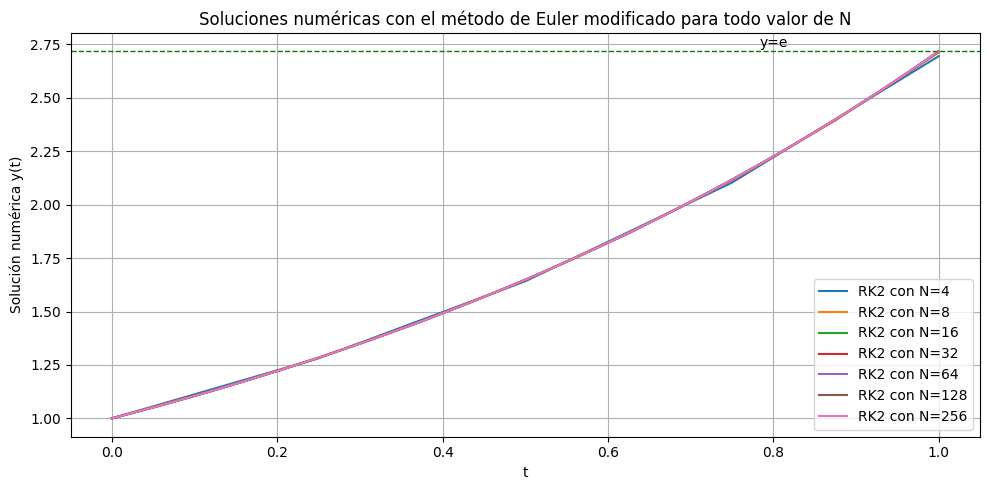

In [6]:
for N in valoresN:
    h = (tf - t0) / N  # Definimos el paso de tiempo h para cada N
    
    # Obtenemos los valores numéricos para RK2 y Euler
    vals_t_rk2, vals_z_rk2 = metodo_rk2_sistemas(z0, t0, h, fEj4, N)
    vals_t_eul, vals_z_eul = metodo_euler_sistemas(z0, t0, h, fEj4, N)
    plt.plot(vals_t_rk2, vals_z_rk2, label=f'RK2 con N={N}')

# Configuramos la gráfica
plt.xlabel('t')
plt.axhline(y=np.exp(1), linestyle='--', color='g',linewidth=1)
plt.text(x=0.8, y=2.74, s='y=e', color='black', fontsize=10, ha='center')
plt.ylabel('Solución numérica y(t)')
plt.title('Soluciones numéricas con el método de Euler modificado para todo valor de N')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Rk2_paratodoN')
plt.show()

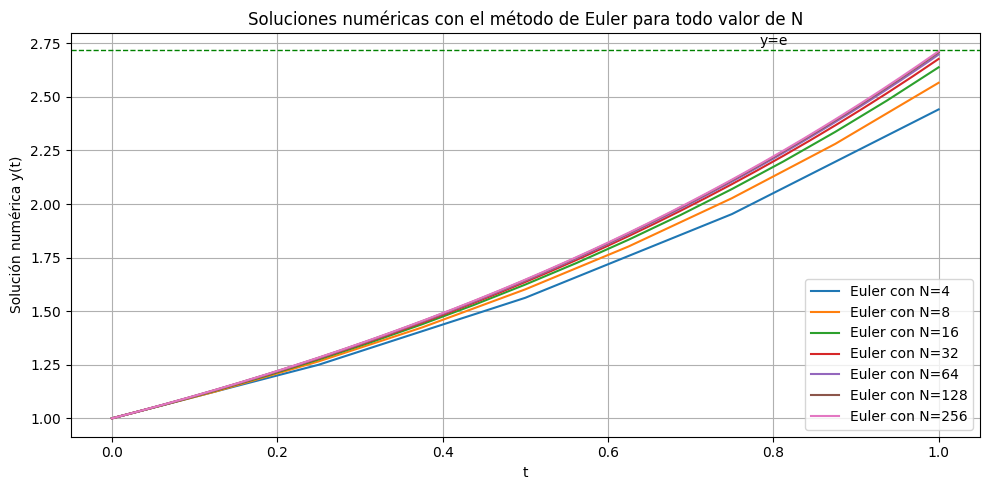

In [7]:
for N in valoresN:
    h = (tf - t0) / N  # Definimos el paso de tiempo h para cada N
    
    # Obtenemos los valores numéricos para RK2 y Euler
    vals_t_rk2, vals_z_rk2 = metodo_rk2_sistemas(z0, t0, h, fEj4, N)
    vals_t_eul, vals_z_eul = metodo_euler_sistemas(z0, t0, h, fEj4, N)
    plt.plot(vals_t_eul, vals_z_eul, label=f'Euler con N={N}')

# Configuramos la gráfica
plt.xlabel('t')
plt.ylabel('Solución numérica y(t)')
plt.axhline(y=np.exp(1), linestyle='--', color='g',linewidth=1)
plt.text(x=0.8, y=2.74, s='y=e', color='black', fontsize=10, ha='center')
plt.title('Soluciones numéricas con el método de Euler para todo valor de N')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Euler_paratodoN')
plt.show()

Observamos de una manera más explícita el incremento de la precisión de cada método tomando N = 4 (mínimo) y N = 256 (máximo).

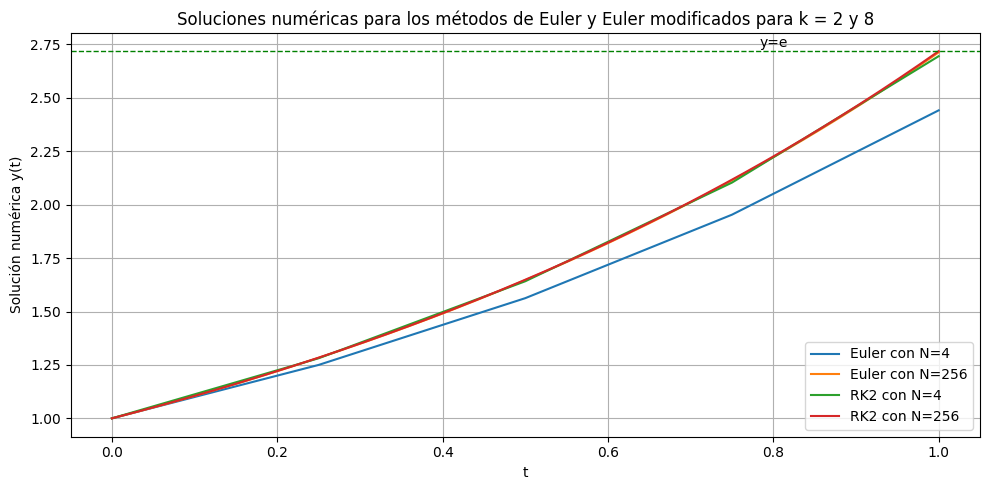

In [8]:
for i in [0,6]:
    N = valoresN[i]
    h = (tf - t0) / N  # Definimos el paso de tiempo h para cada N
    # Obtenemos los valores numéricos para RK2 y Euler
    vals_t_eul, vals_z_eul = metodo_euler_sistemas(z0, t0, h, fEj4, N)
    plt.plot(vals_t_eul, vals_z_eul, label=f'Euler con N={N}')
for i in [0,6]:
    N = valoresN[i]
    h = (tf - t0) / N  # Definimos el paso de tiempo h para cada N
    vals_t_rk2, vals_z_rk2 = metodo_rk2_sistemas(z0, t0, h, fEj4, N)
    plt.plot(vals_t_rk2, vals_z_rk2, label=f'RK2 con N={N}')
# Configuramos la gráfica
plt.xlabel('t')
plt.ylabel('Solución numérica y(t)')
plt.axhline(y=np.exp(1), linestyle='--', color='g',linewidth=1)
plt.text(x=0.8, y=2.74, s='y=e', color='black', fontsize=10, ha='center')
plt.title('Soluciones numéricas para los métodos de Euler y Euler modificados para k = 2 y 8')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

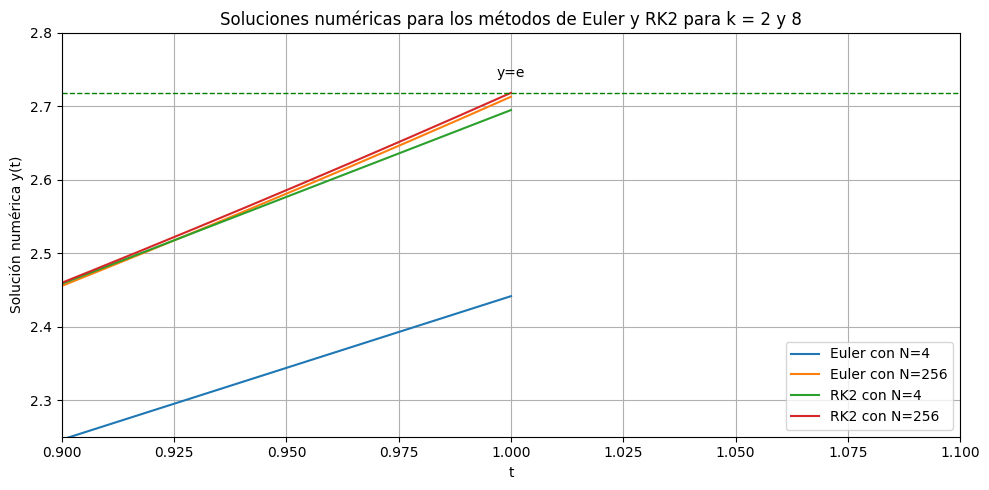

In [14]:
for i in [0, 6]:
    N = valoresN[i]
    h = (tf - t0) / N
    vals_t_eul, vals_z_eul = metodo_euler_sistemas(z0, t0, h, fEj4, N)
    plt.plot(vals_t_eul, vals_z_eul, label=f'Euler con N={N}')
    
for i in [0, 6]:
    N = valoresN[i]
    h = (tf - t0) / N  # Definimos el paso de tiempo h para cada N
    vals_t_rk2, vals_z_rk2 = metodo_rk2_sistemas(z0, t0, h, fEj4, N)
    plt.plot(vals_t_rk2, vals_z_rk2, label=f'RK2 con N={N}')

plt.xlabel('t')
plt.ylabel('Solución numérica y(t)')
plt.axhline(y=np.exp(1), linestyle='--', color='g', linewidth=1)
plt.text(x=1, y=2.74, s='y=e', color='black', fontsize=10, ha='center')
plt.title('Soluciones numéricas para los métodos de Euler y RK2 para k = 2 y 8')
plt.legend()

# Hacemos un zoom en t=1 y y=exp(1)
plt.xlim(0.9, 1.1)  # Ajustamos el rango en t alrededor de 1
plt.ylim(2.25, 2.8)  # Ajustamos el rango en y alrededor de e (~2.718)

plt.grid(True)
plt.tight_layout()
plt.show()

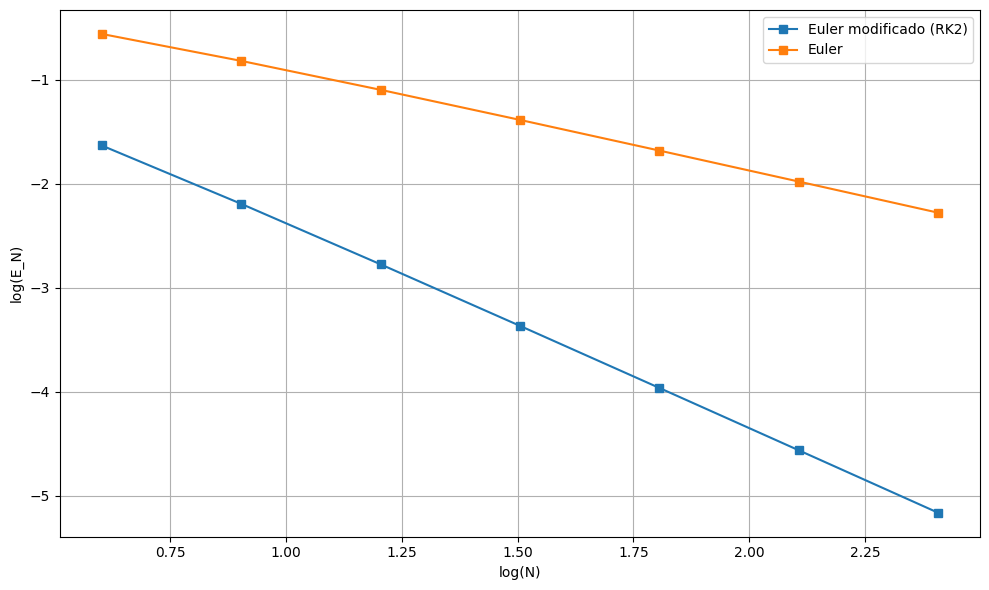

In [18]:
for N in valoresN:
    h = (tf - t0) / N #definimos el h que ingresaremos para cada metodo
    
    vals_t_rk2, vals_z_rk2 = metodo_rk2_sistemas(z0,t0,h,fEj4,N) #obtenemos los vectores de t y z para el metodo de euler modificado
    vals_t_eul, vals_z_eul = metodo_euler_sistemas(z0,t0,h,fEj4,N)#obtenemos los vectores de t y z para el metodo de euler modificado
    yN_eul = vals_z_eul[-1] #ultimo valor de euler.
    yN_rk2 = vals_z_rk2[-1] #ultimo valor de euler modificado.
    
    # Calculamos el error absoluto como la diferencia entre valor verdadero y valor estimado
    E_N_eul = np.abs(np.exp(1)-yN_eul)
    E_N_rk2 = np.abs(np.exp(1) - yN_rk2) 
    errores_euler.append(E_N_eul)
    errores_rk2.append(E_N_rk2)

errores_rk2 = np.array(errores_rk2)
errores_euler= np.array(errores_euler)

plt.figure(figsize=(10, 6))
plt.plot(np.log10(valoresN), np.log10(errores_rk2), 's-', label='Euler modificado (RK2)')
plt.plot(np.log10(valoresN), np.log10(errores_euler), 's-', label='Euler')
plt.xlabel('log(N)')
plt.ylabel('log(E_N)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Realizamos análisis para el método de Euler de los errores globales, logaritmo del error global y la pendiente de la curva ${\log(En)}$ 

Siendo por ejemplo ${\log(EN)}=-1$ un $EN=0.1$
![Gráfico de Euler](Euler_paratodoN.png)
| N  |h| Error global (EN) | log(EN)|Pendiente|
|----|----|-------------|----------|------|
|  4 |0.25 |0.27687558    |-0.55771535|-------|
|  8 |0.125 |0.15249731    |-0.81673780|-0.86045397|
| 16 |0.0625 |0.08035333    |-1.09499611|-0.92435410|
| 32 |0.03125 |0.04129170    |-1.38413725|-0.96050605|
| 64 |0.015625 |0.02093688    |-1.67908812|-0.97980560|
|128 |0.0078125 |0.01054281    |-1.97704367|-0.98978691|
|256 |0.00390625 |0.0052902    |-2.27652756|-0.99486396|

Los valores de las pendientes son correspondiente a calcular $\frac{{\log(EN^k)-\log(EN^{k-1})}}{{\log(N^k)-\log(N^{k-1})}}$ con $k=[2,...,8]$, es decir, se exhiben en la tabla para el N donde termina su cálculo. 

Notamos que es propio del método de Euler que el error disminuya linealmente con respecto al número de pasos por ser $O(h)$
Recordamos del ejercicio 2 del presente informe que un mayor número de pasos $N$ implica una disminución del valor de $h=\frac{T-T0}{N}$ (tenderá a 0) y por correspondencia, no sólo la disminución del error de truncado local y global, sino que también se prueba de manera númerica la convergencia del método de Euler a $y(1)$

Realizamos el análisis previo para los errores globales, logaritmo del error global y la pendiente de la curva ${\log(En)}$ para el método de Runge-Kutta 2 (Euler modificado)
![Gráfico de Euler Modificado](Rk2_paratodoN.png)
| N  |h| Error global (EN) | log(EN)|Pendiente|
|----|----|-------------|----------|------|
|  4 |0.25 |2.34261385e-02    |-3.75390285|-------|
|  8 |0.125 |6.44058991e-03    |-5.04513514|-1.86285442|
| 16 |0.0625 |1.68830598e-03    |-6.38402963|-1.93161644|
| 32 |0.03125 |4.32154479e-04   |-7.74672744|-1.96595738|
| 64 |0.015625 |1.09316895e-04    |-9.12125960|-1.98303072|
|128 |0.0078125 |2.74901378e-05   |-10.50168324|-1.99153035|
|256 |0.00390625 |6.89271830e-06   |-11.88504502|-1.99576918|

Sabemos que el error va como $O(h^k)$ para un método de Runge-Kutta $O(h^k)$, en particular, el método de Euler modificado es un Runge-Kutta $O(h^2)$, por tanto el error decaerá cuadráticamente respecto del $N$ que tomamos
De manera análoga al método de Euler, un mayor número de pasos $N$ implica una disminución del valor de $h=\frac{T-T0}{N}$ (tenderá a 0) y por correspondencia, no sólo la disminución del error de truncado local y global, sino que también el método converge de forma numérica a $y(1)$

In [10]:
print(np.log10(errores_euler))
print(np.log(errores_rk2))

[[-0.55771535]
 [-0.8167378 ]
 [-1.09499611]
 [-1.38413725]
 [-1.67908812]
 [-1.97704367]
 [-2.27652756]]
[[ -3.75390285]
 [ -5.04513514]
 [ -6.38402963]
 [ -7.74672744]
 [ -9.1212596 ]
 [-10.50168324]
 [-11.88504502]]


In [11]:
pendientes_rk2=[]
for i in range(6):
    m=((np.log10(errores_rk2)[i+1]-np.log10(errores_rk2)[i])/(np.log10(valoresN)[i+1]-np.log10(valoresN)[i]))
    pendientes_rk2.append(m)
np.array(pendientes_rk2)

array([[-1.86285442],
       [-1.93161644],
       [-1.96595738],
       [-1.98303072],
       [-1.99153035],
       [-1.99576918]])

In [12]:
pendientes_euler=[]
for i in range(6):
    m=((np.log(errores_euler)[i+1]-np.log(errores_euler)[i])/(np.log(valoresN)[i+1]-np.log(valoresN)[i]))
    pendientes_euler.append(m)
np.array(pendientes_euler)

array([[-0.86045397],
       [-0.9243541 ],
       [-0.96050605],
       [-0.9798056 ],
       [-0.98978691],
       [-0.99486396]])